In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('/home/pi/Titanic/weka1.csv')
print(plt.style.available)
plt.style.use('ggplot')

['seaborn-colorblind', 'tableau-colorblind10', 'seaborn-talk', 'seaborn-darkgrid', 'dark_background', 'fast', 'classic', 'seaborn-whitegrid', 'grayscale', 'seaborn-ticks', 'seaborn-dark-palette', 'seaborn-poster', 'seaborn-muted', 'Solarize_Light2', 'fivethirtyeight', 'seaborn-notebook', 'seaborn-dark', 'ggplot', 'seaborn-pastel', 'seaborn-white', 'seaborn-deep', '_classic_test', 'seaborn-bright', 'bmh', 'seaborn-paper', 'seaborn']


In [3]:
data.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt numeric       310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   class                     310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 15.8+ KB


In [5]:
data.describe()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


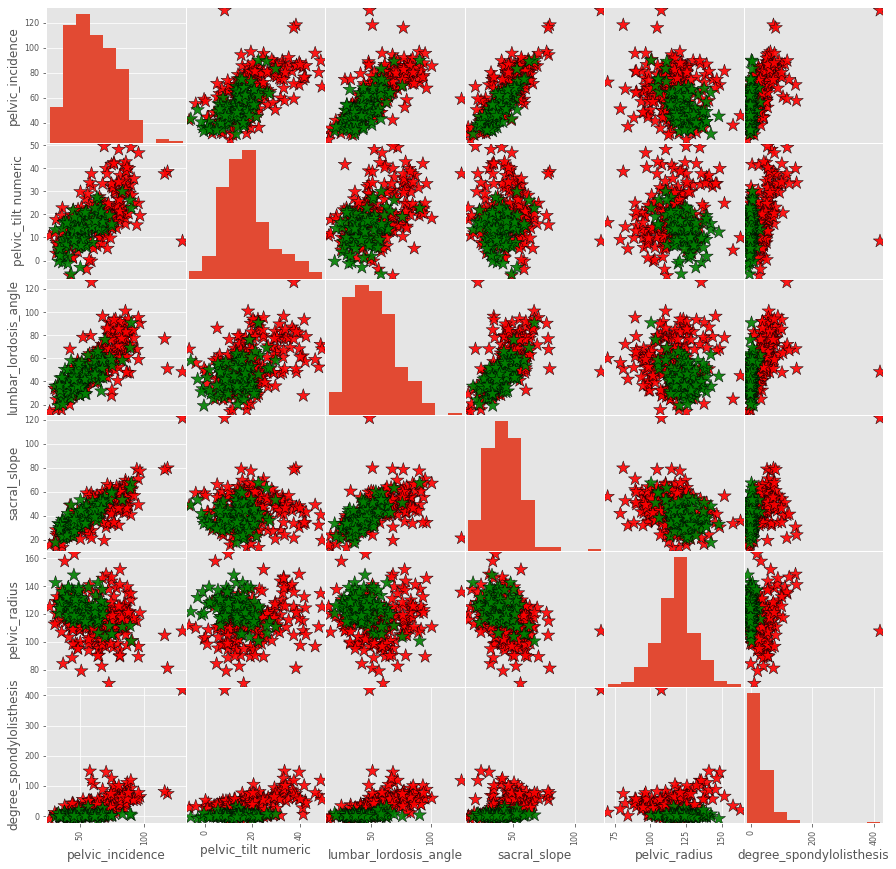

In [6]:
color_list = ['red' if i=='Abnormal' else 'green' for i in data.loc[:,'class']]
pd.plotting.scatter_matrix(data.loc[:, data.columns != 'class'],
                                       c=color_list,
                                       figsize= [15,15],
                                       diagonal='hist',
                                       alpha=0.9,
                                       s = 200,
                                       marker = '*',
                                       edgecolor= "black")
plt.show()

Abnormal    210
Normal      100
Name: class, dtype: int64

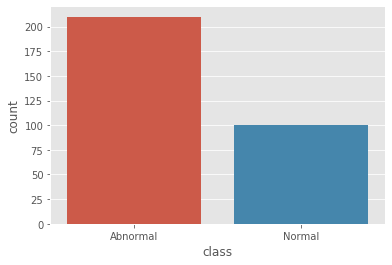

In [7]:
sns.countplot(x='class',data = data)
data.loc[:,'class'].value_counts()

In [8]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
X,y = data.iloc[:,data.columns !='class'],data.loc[:,'class']
knn.fit(X,y)
pred = knn.predict(X)
print('Prediction : {}'.format(pred))

Prediction : ['Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Normal' 'Normal'
 'Abnormal' 'Normal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Normal' 'Normal' 'Normal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Normal' 'Abnormal' 'Normal'
 'Normal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Normal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'A

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)
knn = KNeighborsClassifier(n_neighbors=3)
X,y = data.loc[:,data.columns != 'class'], data.loc[:,'class']
knn.fit(X_train,y_train)
pred  = knn.predict(X_test)
#print('prediction : \n {}'.format(pred))
print('With KNN (K=3) accuracy is: ',knn.score(X_test,y_test))

With KNN (K=3) accuracy is:  0.8602150537634409


In [10]:
neigh = np.arange(1,25)
train_acc = []
test_acc = []
for i,k in enumerate(neigh):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    train_acc.append(knn.score(X_train,y_train))
    test_acc.append(knn.score(X_test,y_test))

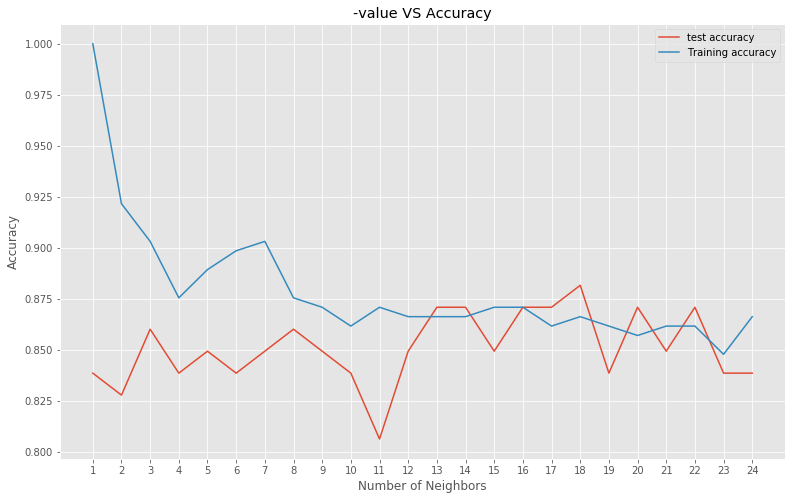

Best accuracy is 0.8817204301075269 with K = 18


In [11]:
plt.figure(figsize=[13,8])
plt.plot(neigh,test_acc,label='test accuracy')
plt.plot(neigh,train_acc,label='Training accuracy')
plt.legend()
plt.title('-value VS Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(neigh)
plt.show()
print("Best accuracy is {} with K = {}".format(np.max(test_acc),1+test_acc.index(np.max(test_acc))))

In [12]:
data1 = data[data['class']=='Abnormal']
data1

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal
...,...,...,...,...,...,...,...
205,80.111572,33.942432,85.101608,46.169139,125.593624,100.292107,Abnormal
206,95.480229,46.550053,59.000000,48.930176,96.683903,77.283072,Abnormal
207,74.094731,18.823727,76.032156,55.271004,128.405731,73.388216,Abnormal
208,87.679087,20.365613,93.822416,67.313473,120.944829,76.730629,Abnormal


In [13]:
X = np.array(data1.loc[:,'pelvic_incidence']).reshape(-1,1)
y = np.array(data1.loc[:,'sacral_slope']).reshape(-1,1)

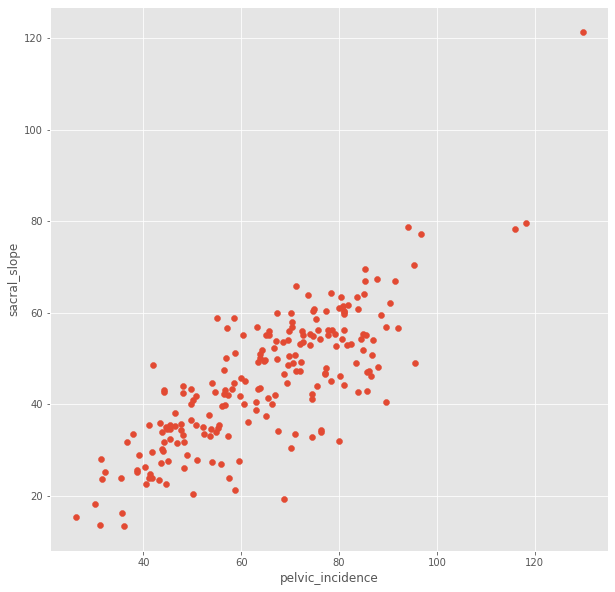

In [14]:
plt.figure(figsize=[10,10])
plt.scatter(x=X,y=y)
plt.xlabel('pelvic_incidence')
plt.ylabel('sacral_slope')
plt.show()

R^2 score 0.6458410481075871


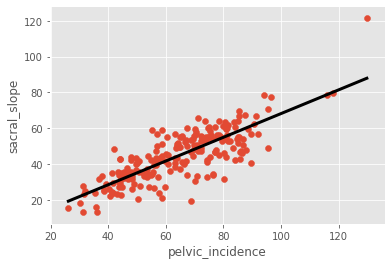

In [15]:
from sklearn.linear_model import LinearRegression 
reg = LinearRegression()
pred_space = np.linspace(min(X),max(X)).reshape(-1,1)
reg.fit(X,y)
pred = reg.predict(pred_space)
print('R^2 score',reg.score(X,y))
plt.plot(pred_space,pred,color='black',linewidth=3)
plt.scatter(x=X,y=y)
plt.xlabel('pelvic_incidence')
plt.ylabel('sacral_slope')
plt.show()

In [16]:
from sklearn.model_selection import cross_val_score
reg = LinearRegression()
k=5
cv_res = cross_val_score(reg,X,y,cv=k)
print('cv score: ',cv_res)
print('cv scores avg : ', np.sum(cv_res)/k)

cv score:  [0.32924233 0.61683991 0.53117056 0.1954798  0.29299864]
cv scores avg :  0.39314625028848665


In [17]:
from sklearn.linear_model import Ridge
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=2,test_size= 0.3)
ridge = Ridge(alpha=0.1,normalize=True)
ridge.fit(X_train,y_train)
ridge_predict = ridge.predict(X_test)
print('Riege score: ',ridge.score(X_test,y_test))

Riege score:  0.5608287918841997


In [18]:
from sklearn.linear_model import Lasso
X = np.array(data1.loc[:,['pelvic_incidence','pelvic_tilt numeric','lumbar_lordosis_angle','pelvic_radius']])
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 3, test_size = 0.3)
lasso = Lasso(alpha=0.1,normalize=True)
lasso.fit(X_train,y_train)
ridge_predict = lasso.predict(X_test)
print('Lasso score: ', lasso.score(X_test,y_test))
print('Lasso coefficients: ',lasso.coef_)

Lasso score:  0.9640334804327548
Lasso coefficients:  [ 0.82498243 -0.7209057   0.         -0.        ]


In [19]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
X,y = data.loc[:,data.columns !='class'],data.loc[:,'class']
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 1, test_size = 0.3)
rf = RandomForestClassifier(random_state=4)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
print('Confusion matrix: \n',cm)
print('Classification report: \n',classification_report(y_test,y_pred))

Confusion matrix: 
 [[60  6]
 [ 8 19]]
Classification report: 
               precision    recall  f1-score   support

    Abnormal       0.88      0.91      0.90        66
      Normal       0.76      0.70      0.73        27

    accuracy                           0.85        93
   macro avg       0.82      0.81      0.81        93
weighted avg       0.85      0.85      0.85        93



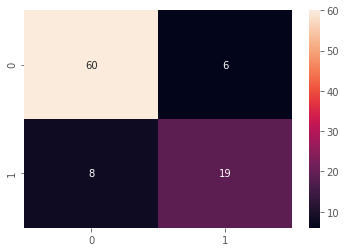

In [20]:
sns.heatmap(cm,annot=True,fmt='d')
plt.show()

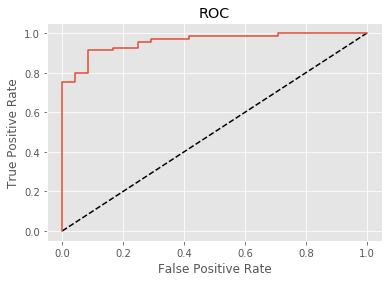

In [21]:
from sklearn.metrics import roc_curve 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report
data['class_binary'] = [1 if i =='Abnormal' else 0 for i in data.loc[:,'class']]
X,y = data.loc[:,(data.columns !='class')& (data.columns !='class_binary')],data.loc[:,'class_binary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred = logreg.predict_proba(X_test)[:,1]
fpr,tpr,thresholds = roc_curve(y_test,y_pred)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

In [22]:
from sklearn.model_selection import GridSearchCV
grid = {'n_neighbors': np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn,grid,cv=3)
knn_cv.fit(X,y)
print("Tuned Hyper k : {}".format(knn_cv.best_params_))
print("Bset score: {}".format(knn_cv.best_score_))

Tuned Hyper k : {'n_neighbors': 4}
Bset score: 0.7559434901667911


In [23]:
param_grid = {'C': np.logspace(-3,3,7),'penalty':['l1','l2']}
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)
logreg = LogisticRegression()
logreg_cv = GridSearchCV(logreg,param_grid,cv=3)
logreg_cv.fit(X_train,y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [24]:
print('Tuned Hyperparam: {}'.format(logreg_cv.best_params_))
print("Best Accuracy: {}".format(logreg_cv.best_score_))

Tuned Hyperparam: {'C': 0.1, 'penalty': 'l2'}
Best Accuracy: 0.8433536276002029


In [25]:
data = pd.read_csv('/home/pi/Titanic/weka.csv')


In [26]:
df = pd.get_dummies(data)
df.head(10)

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class_Hernia,class_Normal,class_Spondylolisthesis
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,1,0,0
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,1,0,0
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,1,0,0
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,1,0,0
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,1,0,0
5,40.250200,13.921907,25.124950,26.328293,130.327871,2.230652,1,0,0
6,53.432928,15.864336,37.165934,37.568592,120.567523,5.988551,1,0,0
7,45.366754,10.755611,29.038349,34.611142,117.270068,-10.675871,1,0,0
8,43.790190,13.533753,42.690814,30.256437,125.002893,13.289018,1,0,0
9,36.686353,5.010884,41.948751,31.675469,84.241415,0.664437,1,0,0


In [27]:
df.drop("class_Normal",axis=1,inplace=True)
df.head(10)

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class_Hernia,class_Spondylolisthesis
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,1,0
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,1,0
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,1,0
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,1,0
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,1,0
5,40.250200,13.921907,25.124950,26.328293,130.327871,2.230652,1,0
6,53.432928,15.864336,37.165934,37.568592,120.567523,5.988551,1,0
7,45.366754,10.755611,29.038349,34.611142,117.270068,-10.675871,1,0
8,43.790190,13.533753,42.690814,30.256437,125.002893,13.289018,1,0
9,36.686353,5.010884,41.948751,31.675469,84.241415,0.664437,1,0


In [28]:
data.shape

(310, 7)

In [29]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
steps = [('scalar',StandardScaler()),('SVM',SVC())]
pipeline = Pipeline(steps)
parameters = {'SVM__C':[1, 10, 100],'SVM__gamma':[0.1, 0.01]}
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=1)
cv = GridSearchCV(pipeline,param_grid = parameters,cv=3)
cv.fit(X_train,y_train)
y_pred = cv.predict(X_test)
print('Accuracy : {}'.format(cv.score(X_test,y_test)))
print("Tuned Model Parameters: {}".format(cv.best_params_))

Accuracy : 0.8548387096774194
Tuned Model Parameters: {'SVM__C': 100, 'SVM__gamma': 0.01}


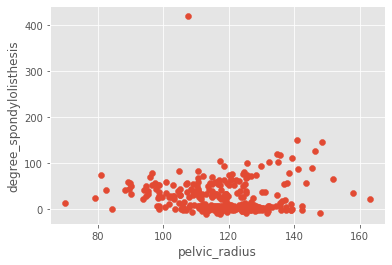

In [38]:
data = pd.read_csv('/home/pi/Titanic/weka1.csv')
plt.scatter(data['pelvic_radius'],data['degree_spondylolisthesis'])
plt.xlabel('pelvic_radius')
plt.ylabel('degree_spondylolisthesis')
plt.show()

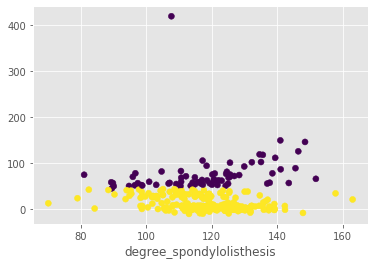

In [39]:
data2 = data.loc[:,['degree_spondylolisthesis','pelvic_radius']]
from sklearn.cluster import KMeans
kmeans  = KMeans(n_clusters=2)
kmeans.fit(data2)
labels = kmeans.predict(data2)
plt.scatter(data['pelvic_radius'],data['degree_spondylolisthesis'],c = labels)
plt.xlabel('pelvic_radius')
plt.xlabel('degree_spondylolisthesis')
plt.show()

In [40]:
import pandas as pd
df = pd.DataFrame({'labels':labels,"class":data['class']})
ct = pd.crosstab(df['labels'],df['class'])
print(ct)

class   Abnormal  Normal
labels                  
0             72       0
1            138     100


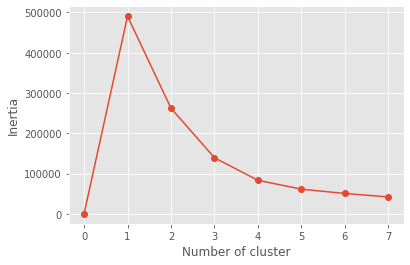

In [42]:
inertia_list = np.empty(8)
for i in range(1,8):
    kmeans =KMeans(n_clusters=i)
    kmeans.fit(data2)
    inertia_list[i] = kmeans.inertia_
plt.plot(range(0,8),inertia_list,'-o')
plt.xlabel('Number of cluster')
plt.ylabel('Inertia')
plt.show()

In [48]:
data = pd.read_csv('/home/pi/Titanic/weka1.csv')
data3 = data.drop('class',axis = 1)

In [49]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
scalar = StandardScaler()
kmeans = KMeans(n_clusters = 2)
pipe = make_pipeline(scalar,kmeans)
pipe.fit(data3)
labels = pipe.predict(data3)
df = pd.DataFrame({'labels':labels,"class":data['class']})
ct = pd.crosstab(df['labels'],df['class'])
print(ct)

class   Abnormal  Normal
labels                  
0            116      10
1             94      90


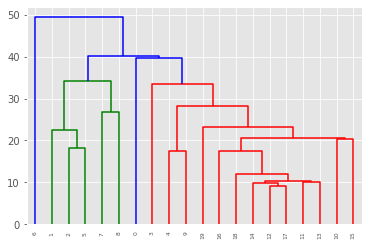

In [45]:
from scipy.cluster.hierarchy import linkage,dendrogram

merg = linkage(data3.iloc[200:220,:],method = 'single')
dendrogram(merg, leaf_rotation = 90, leaf_font_size = 6)
plt.show()

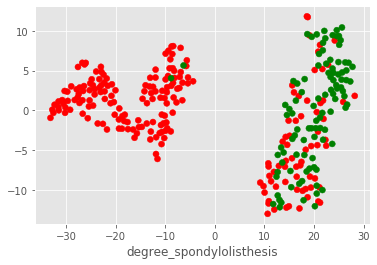

In [50]:
from sklearn.manifold import TSNE
model = TSNE(learning_rate=100)
transformed = model.fit_transform(data2)
x = transformed[:,0]
y = transformed[:,1]
plt.scatter(x,y,c = color_list )
plt.xlabel('pelvic_radius')
plt.xlabel('degree_spondylolisthesis')
plt.show()

In [51]:
from sklearn.decomposition import PCA
model = PCA()
model.fit(data3)
transformed = model.transform(data3)
print('Principle components: ',model.components_)

Principle components:  [[ 3.23645647e-01  1.13192291e-01  3.03674740e-01  2.10453357e-01
  -2.99598300e-02  8.63153779e-01]
 [-4.76634849e-01 -9.85632787e-02 -5.32783979e-01 -3.78071570e-01
   3.21809199e-01  4.82438036e-01]
 [-1.54481282e-03 -2.64657410e-01 -4.96541893e-01  2.63112598e-01
  -7.74612852e-01  1.18940778e-01]
 [ 3.73677251e-01  7.54113757e-01 -3.39411757e-01 -3.80436506e-01
  -1.75106042e-01 -3.29143086e-02]
 [-4.41703869e-01  7.35414748e-02  5.12024113e-01 -5.15245344e-01
  -5.14639730e-01  8.35992525e-02]
 [ 5.77350269e-01 -5.77350269e-01 -1.08930087e-11 -5.77350269e-01
  -3.59065555e-12  3.06732417e-12]]


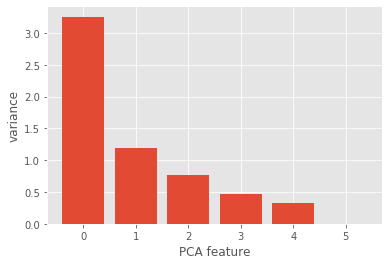

In [52]:
scaler = StandardScaler()
pca = PCA()
pipeline = make_pipeline(scaler,pca)
pipeline.fit(data3)
plt.bar(range(pca.n_components_), pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.show()

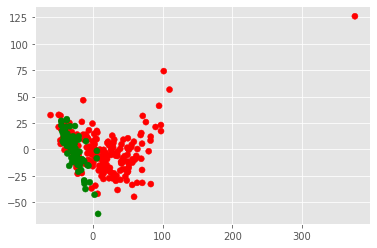

In [53]:
pca = PCA(n_components = 2)
pca.fit(data3)
transformed = pca.transform(data3)
x = transformed[:,0]
y = transformed[:,1]
plt.scatter(x,y,c = color_list)
plt.show()